In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
# from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import rasterio

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\ymax_pc.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
    
    # site = filename.split('d13c_')[1]
    site_name.append(filename)

tiff_dir = r'D:\wenqu\chapter1_2\updated_aviris\clipped_aviris\single_aviris_pixel\AVIRIS_NG_ALL'


band_data_list = []

for site in site_name:
    print(site)
    tif_path = os.path.join(tiff_dir, site)
    if os.path.exists(tif_path):
        with rasterio.open(tif_path) as src:
            pixel_values = []
            for band in range(1, src.count ):
                band_data = src.read(band)
                # Mask background value (-9999.0)
                valid_data = band_data[band_data != -9999.0]
                if valid_data.size > 0:
                    mean_value = valid_data.mean()
                else:
                    mean_value = np.nan  # If no valid pixel, set to NaN
                pixel_values.append(mean_value)
            band_data_list.append([site] + pixel_values)
    else:
        print(f"File not found: {tif_path}")

# Create column names
column_names = ['filename'] + [f'band_{i}' for i in range(1, 425)]

# Create DataFrame
df = pd.DataFrame(band_data_list, columns=column_names)

# Optional: save to CSV
# df.to_csv('output_pixel_data_no_background.csv', index=False)

print(df.head())

site1b_023_040_clipped.tif
site1b_024_016_clipped.tif
site1b_024_018_clipped.tif
site1b_024_022_clipped.tif
site1b_024_030_clipped.tif
site1b_024_031_clipped.tif
site1b_025_007_clipped.tif
site1b_025_018_clipped.tif
site1b_025_019_clipped.tif
site1b_025_026_clipped.tif
site1b_025_031_clipped.tif
site1b_025_033_clipped.tif
site1b_025_035_clipped.tif
site1b_025_039_clipped.tif
site1b_025_041_clipped.tif
site1b_025_044_clipped.tif
site1b_026_008_clipped.tif
site1b_026_011_clipped.tif
site1b_026_018_clipped.tif
site1b_026_031_clipped.tif
site1b_026_034_clipped.tif
site1b_027_035_clipped.tif
site1b_027_041_clipped.tif
site1b_027_044_clipped.tif
site1b_028_009_clipped.tif
site1b_028_019_clipped.tif
site1b_028_035_clipped.tif
site1b_029_012_clipped.tif
site1b_029_018_clipped.tif
site1b_029_020_clipped.tif
site1b_029_021_clipped.tif
site1b_029_030_clipped.tif
site1b_029_042_clipped.tif
site1b_029_044_clipped.tif
site1b_030_009_clipped.tif
site1b_030_012_clipped.tif
site1b_030_013_clipped.tif
s

In [3]:
df_spectral = df
df_spectral.head()  #

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_415,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424
0,site1b_023_040_clipped.tif,0.045220,0.041748,0.042282,0.040922,0.042815,0.040010,0.037958,0.038371,0.036112,...,0.071347,0.063685,0.051910,0.061370,0.053125,0.066676,0.057680,0.123556,0.088136,0.087504
1,site1b_024_016_clipped.tif,0.048939,0.046364,0.044615,0.044824,0.042590,0.039332,0.038095,0.037492,0.035918,...,0.057357,0.037516,0.043186,0.039395,0.042552,0.054276,0.164978,0.090032,0.068948,0.083395
2,site1b_024_018_clipped.tif,0.048934,0.044142,0.042059,0.039934,0.039587,0.036803,0.035807,0.036525,0.034081,...,0.044463,0.041784,0.037559,0.048106,0.054135,0.042648,0.037521,0.103987,0.062151,0.062152
3,site1b_024_022_clipped.tif,0.049881,0.048410,0.043863,0.044790,0.042539,0.038298,0.037221,0.036300,0.034691,...,0.078993,0.066684,0.057506,0.059021,0.071539,0.063961,0.076524,0.073048,0.074294,0.098398
4,site1b_024_030_clipped.tif,0.048836,0.046687,0.043086,0.041445,0.043002,0.039869,0.038701,0.039223,0.037710,...,0.081180,0.075644,0.057538,0.068110,0.038588,0.080825,0.092814,0.107196,0.084620,0.077490


In [4]:
labels = [] 
for i in range(len(df_spectral['filename'])):
    substrings = df_spectral['filename'][i]
    site_name = substrings.split("_")[0]
    labels.append(site_name)

In [5]:
# print(len(labels), labels)


In [6]:
def plot_mse_vs_components(X, y, max_comp, wavelengths=None):
    """
    Perform PLS variable selection and optimize the number of components.

    Parameters:
    X (numpy.ndarray): Predictor variables (samples x wavelengths).
    y (numpy.ndarray): Response variable (samples x 1 or 1D array).
    max_comp (int): Maximum number of PLS components to test.
    wavelengths (numpy.ndarray, optional): Actual wavelength values (same length as X.shape[1]).

    Returns:
    tuple:
        - X_reduced (numpy.ndarray): Reduced predictor variables with selected wavelengths.
        - n_comp_opt (int): Optimized number of PLS components.
        - wavelengths_to_keep (numpy.ndarray): Indices of wavelengths to keep.
        - sorted_ind (numpy.ndarray): Sorted feature indices by importance.
    """
    mse = np.zeros((max_comp, X.shape[1] - max_comp + 1))

    for i in range(max_comp):
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)

        # Sort features by absolute regression coefficient values
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
        Xc = X[:, sorted_ind]

        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1])
        for j in range(max_j):
            pls2 = PLSRegression(n_components=i + 1)
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))

        stdout.write(f"\r{i + 1}/{max_comp} components processed")
        stdout.flush()

    stdout.write("\n")

    # Handle edge case for all-zero MSE
    non_zero_mse = mse[np.nonzero(mse)]
    if non_zero_mse.size == 0:
        raise ValueError("MSE array contains no valid values. Check your data.")

    # Find the combination with the minimum MSE
    mseminx, mseminy = np.where(mse == np.min(non_zero_mse))
    n_comp_opt = mseminx[0] + 1
    start_feature_index = mseminy[0]

    # Fit again to get the final sorted feature importance
    pls_final = PLSRegression(n_components=n_comp_opt )
    pls_final.fit(X, y)
    sorted_ind = np.argsort(np.abs(pls_final.coef_.flatten()))

    # Get the wavelength indices to keep and corresponding coefficients
    wavelengths_to_keep = sorted_ind[start_feature_index:]
    final_coefs = pls_final.coef_.flatten()[wavelengths_to_keep]

    # Build separate lists
    wavelength_index_list = wavelengths_to_keep.tolist()
    coefficient_list = final_coefs.tolist()

    # Print summary
    print(f"\nOptimal number of components: {n_comp_opt}")
    print(f"Start feature index: {start_feature_index}")
    print(f"\nWavelength indices to keep: {wavelength_index_list}")
    print(f"Corresponding coefficients: {coefficient_list}")

    if wavelengths is not None:
        print("\nWavelength (nm) and coefficient pairs:")
        for idx, coef in zip(wavelength_index_list, coefficient_list):
            print(f"Wavelength {wavelengths[idx]:.2f} nm (Index {idx}): Coefficient {coef:.6f}")
    else:
        print("\nIndex and coefficient pairs:")
        for idx, coef in zip(wavelength_index_list, coefficient_list):
            print(f"Index {idx}: Coefficient {coef:.6f}")

    X_reduced = X[:, wavelengths_to_keep]
    return X_reduced, n_comp_opt, wavelengths_to_keep, sorted_ind


In [7]:
def simple_pls_cv(X, y, n_comp, labels, filename):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
    y_cv = cross_val_predict(pls, X, y, cv=20)

    # Flatten for evaluation
    y_flat = y.ravel()
    y_c_flat = y_c.ravel()
    y_cv_flat = y_cv.ravel()

    # Calculate scores
    score_c = r2_score(y_flat, y_c_flat)
    score_cv = r2_score(y_flat, y_cv_flat)
    # rmse_c = mean_squared_error(y_flat, y_c_flat, squared=False)
    # rmse_cv = mean_squared_error(y_flat, y_cv_flat, squared=False)



    rmse_c = np.sqrt(mean_squared_error(y_flat, y_c_flat))  # <-- fixed
    rmse_cv = np.sqrt(mean_squared_error(y_flat, y_cv_flat))  # <-- fixed


    print(f'R2 calib: {score_c:5.3f}')
    print(f'R2 CV: {score_cv:5.3f}')
    print(f'RMSE calib: {rmse_c:5.3f}')
    print(f'RMSE CV: {rmse_cv:5.3f}')

    # Fit a linear trend line to predicted vs measured
    z = np.polyfit(y_flat, y_cv_flat, 1)
    print(f"Intercept: {z[1]}, Slope: {z[0]}")

    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Label styling dictionary
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}
        }

        # Write to CSV and scatter each point
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                csvwriter.writerow([i, label, y_cv_flat[i], y_flat[i]])

        for i, label in enumerate(labels):
            props = label_dict.get(label, {'marker': 'x', 'color': 'gray'})
            ax.scatter(y_cv_flat[i], y_flat[i], marker=props['marker'],
                       c=props['color'], edgecolors='k', label=label if i == 0 else "")

        # Create legend
        legend_handles = [
            plt.Line2D([], [], marker=props['marker'], color=props['color'],
                       linestyle='None', label=label)
            for label, props in label_dict.items()
        ]
        ax.legend(handles=legend_handles)

        # Plot regression line and 1:1 line
        ax.plot(z[1] + z[0] * y_flat, y_flat, c='red', linewidth=1, label='Fit line')
        ax.plot(y_flat, y_flat, color='black', linewidth=1, label='1:1 line')

        ax.set_title(f'$R^2$ (CV): {score_cv:.3f}')
        ax.set_xlabel('Predicted $^{\circ}$Brix')
        ax.set_ylabel('Measured $^{\circ}$Brix')
        plt.show()

# d13c

In [9]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\numpy\std_d13c.npy',  allow_pickle=True)

In [10]:
d13c_trait_pdf_ymax.shape

(400, 2)

In [11]:
y_d13c_max_df = pd.DataFrame(d13c_trait_pdf_ymax, columns=['y_value', 'filename'])
y_d13c_max_df['filename'] = y_d13c_max_df['filename'].str.replace('d13c_', '')

y_d13c_max_df['y_value'] = pd.to_numeric(y_d13c_max_df['y_value'])
y_d13c_max_df_array = y_d13c_max_df.to_numpy()
y_d13c_max_df
# Merge y1_cleaned with df_spectral
merged_y_d13c_max_df = pd.merge(df_spectral, y_d13c_max_df, on='filename')
# #  # Band columns as predictors
merged_y_d13c_max_df   
X_d13c_ymax = merged_y_d13c_max_df.filter(regex='^band_').values 

y_d13c_max = merged_y_d13c_max_df[['y_value']].values  
y_d13c_max.shape

(400, 1)

In [12]:
# Call the model function
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max  = plot_mse_vs_components(X_d13c_ymax, y_d13c_max, 30)
# opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(X_d13c_std1, y_d13c_std1, 50)


30/30 components processed

Optimal number of components: 10
Start feature index: 371

Wavelength indices to keep: [401, 20, 288, 209, 24, 37, 418, 18, 239, 53, 195, 391, 309, 62, 23, 280, 34, 66, 52, 409, 394, 202, 58, 200, 5, 218, 6, 4, 307, 422, 308, 9, 311, 41, 313, 0, 60, 57, 316, 61, 12, 59, 35, 215, 303, 408, 416, 219, 193, 310, 10, 289, 14]
Corresponding coefficients: [0.046535977619194015, 0.04721022229761184, 0.04724551737910713, -0.04787535453964441, -0.04815648423449186, -0.04840424580465514, -0.050737337753756814, 0.0511694998252413, -0.05124918164880093, 0.051368834504732036, -0.052263662863675495, -0.052369505763814606, -0.05250447380740222, 0.05296645479701263, 0.05509272520653806, -0.055402695258940086, -0.05627574666000133, -0.05643917437875954, 0.057287857066690775, 0.057898828296754724, -0.05966401915235528, -0.06009569305365845, 0.06226434373115929, -0.06461735238478374, -0.06586021443116581, -0.0693901203069947, -0.07008965859305918, 0.07017799379720098, -0.073419

R2 calib: 0.728
R2 CV: 0.639
RMSE calib: 0.257
RMSE CV: 0.296
Intercept: -8.916413638269105, Slope: 0.6854045523075458


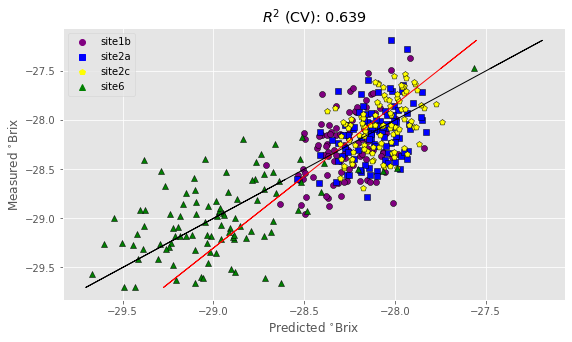

In [13]:
file_name_d13c_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d13c_max_resampled.csv'
simple_pls_cv(opt_Xc_d13c_max, y_d13c_max,
              ncomp_d13c_max, labels, file_name_d13c_max)

In [14]:
pls_final = PLSRegression(n_components=ncomp_d13c_max, scale=True)
pls_final.fit(opt_Xc_d13c_max, y_d13c_max)



PLSRegression(n_components=10)

In [15]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[4.525195702033592,
 2.556957089869569,
 0.10343166465415392,
 -0.5937268642062575,
 -12.768682665456229,
 -1.3398605433612119,
 -3.8232205901472636,
 7.960985429889321,
 -4.893438531101649,
 7.272835086308854,
 -0.14127069521375854,
 -5.104779838265443,
 -0.004917111939139824,
 4.138386388009142,
 2.930919428918483,
 -3.506837386265157,
 -4.270202852018958,
 -7.86931696505053,
 7.736202507934307,
 8.673452151162351,
 -5.1628381562165995,
 -0.012811302768737197,
 4.263787711305839,
 -0.014758113618251375,
 -5.367401185305582,
 -3.0720633566042834,
 -6.640219484819768,
 8.188846994696343,
 -0.0064668756020571025,
 0.17372980578464162,
 0.010179335602456865,
 -16.80761367917077,
 -0.1433736767067505,
 -14.135959645363307,
 -1.800521420677139,
 3.904873026465252,
 7.863526763654953,
 7.464972981584413,
 -2.4830900796539748,
 8.283688496996628,
 -42.52662594260868,
 7.89369309816759,
 -15.094020690815249,
 -4.617637767159046,
 0.016556214062642936,
 8.796483164050052,
 9.099782748433743,
 

In [16]:
transformed_intercept

array([-26.31894329])

# d13 std

In [17]:
y_d13c_std_df = pd.DataFrame(d13c_trait_pdf_std, columns=['y_value', 'filename'])
y_d13c_std_df['filename'] = y_d13c_std_df['filename'].str.replace('d13c_', '')

y_d13c_std_df['y_value'] = pd.to_numeric(y_d13c_std_df['y_value'])

y_d13c_std_df_array = y_d13c_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d13c_std_df = pd.merge(df_spectral, y_d13c_std_df, on='filename')
 # Band columns as predictors
    
X_d13c_std = merged_y_d13c_std_df.filter(regex='^band_').values 
y_d13c_std = merged_y_d13c_std_df[['y_value']].values  

In [18]:
print(X_d13c_std.shape, y_d13c_std.shape)

(400, 424) (400, 1)


In [19]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std  = plot_mse_vs_components(X_d13c_std, y_d13c_std, 30)

30/30 components processed

Optimal number of components: 20
Start feature index: 275

Wavelength indices to keep: [41, 258, 154, 42, 146, 299, 80, 99, 357, 192, 408, 355, 306, 325, 135, 294, 367, 305, 293, 298, 295, 292, 266, 186, 185, 94, 169, 197, 401, 221, 237, 20, 296, 265, 368, 109, 190, 98, 127, 282, 318, 320, 384, 244, 144, 34, 345, 21, 187, 309, 50, 291, 222, 70, 175, 377, 218, 331, 396, 391, 141, 172, 126, 161, 45, 86, 96, 286, 40, 32, 33, 229, 4, 386, 27, 136, 145, 123, 6, 249, 383, 238, 30, 82, 304, 51, 246, 314, 55, 37, 223, 162, 116, 16, 52, 375, 142, 349, 124, 176, 279, 56, 311, 328, 57, 256, 297, 59, 83, 263, 277, 106, 157, 95, 242, 25, 239, 149, 392, 283, 103, 276, 369, 3, 313, 5, 152, 374, 68, 49, 31, 312, 65, 371, 202, 205, 315, 324, 23, 232, 18, 151, 301, 24, 316, 110, 203, 206, 155]
Corresponding coefficients: [0.11129362799621098, -0.1126610590299107, 0.11374931487127855, 0.11451136071206468, -0.11538914333721585, 0.11653738027106235, -0.11655608009647557, 0.11669

R2 calib: 0.935
R2 CV: 0.798
RMSE calib: 0.143
RMSE CV: 0.254
Intercept: 0.17140537213958354, Slope: 0.8640996608354217


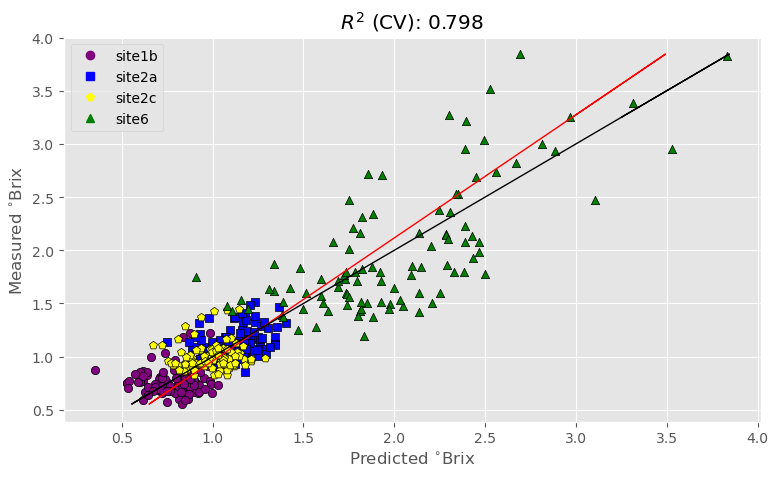

In [20]:
file_name_d13c_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d13c_std_resampled.csv'
simple_pls_cv(opt_Xc_d13c_std, y_d13c_std,
              ncomp_d13c_std, labels, file_name_d13c_std)

In [21]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_d13c_std, scale=True)
pls_final.fit(opt_Xc_d13c_std, y_d13c_std)




PLSRegression(n_components=20)

In [22]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[8.00340030238185,
 -7.692806254143103,
 -1.2602844888075222,
 0.7651972027125249,
 -6.846755492523886,
 0.003814520811556185,
 -2.9516796355319648,
 8.58594209469411,
 -4.128494265378888,
 -0.7557132308096041,
 -4.666746403142105,
 -10.02038505881362,
 0.002650528731272605,
 -1.3400410884344893,
 5.482949030720422,
 0.0025612132583490567,
 -5.806056341705133,
 0.001916452692675035,
 0.004097326113866938,
 0.0035763029209610092,
 0.002172782729478225,
 0.0024346628446285474,
 13.322058162925757,
 3.572067831354309,
 -5.502582578191234,
 3.366024721540551,
 -5.6418801043736355,
 0.005429915164883547,
 13.840639778905881,
 -2.9216145319074975,
 8.251756359416047,
 9.355143503337548,
 0.004463805355187405,
 8.110409675938804,
 8.48510359749329,
 3.7161932139559846,
 2.6047426619852003,
 9.53508798308288,
 -13.451690699179071,
 -2.2650526942368887,
 2.2578389458396795,
 -10.59985563295062,
 -1.2563513189455184,
 10.83485070578003,
 -16.207079673307007,
 -15.589495122150232,
 -2.26293311078

In [23]:
transformed_intercept

array([-0.30565081])

# d15n

In [8]:
d15n_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\std_d15n.npy',  allow_pickle=True)

In [9]:
d15n_trait_pdf_std

array([[2.0243439550462257, 'site1b_023_040_clipped.tif'],
       [1.9599066416957187, 'site1b_024_016_clipped.tif'],
       [2.067422452782731, 'site1b_024_030_clipped.tif'],
       [1.9610077758809963, 'site1b_024_031_clipped.tif'],
       [2.547402757556801, 'site1b_025_007_clipped.tif'],
       [1.725473500249934, 'site1b_025_018_clipped.tif'],
       [1.8020111081682708, 'site1b_025_019_clipped.tif'],
       [2.1813254408911122, 'site1b_025_031_clipped.tif'],
       [2.190180197553006, 'site1b_025_033_clipped.tif'],
       [2.019513311329371, 'site1b_025_035_clipped.tif'],
       [2.0566432276098787, 'site1b_025_039_clipped.tif'],
       [2.1508960557731767, 'site1b_025_041_clipped.tif'],
       [1.9056014695089722, 'site1b_025_044_clipped.tif'],
       [2.539755166090724, 'site1b_026_007_clipped.tif'],
       [2.224684083295593, 'site1b_026_008_clipped.tif'],
       [1.8895239609613883, 'site1b_026_018_clipped.tif'],
       [2.1725732983238832, 'site1b_026_031_clipped.tif'],
    

In [10]:
y_d15n_max = np.array(d15n_trait_pdf_ymax)
y_d15n_std = np.array(d15n_trait_pdf_std)

In [11]:
y_d15n_max.shape

(400, 2)

In [12]:
y_d15n_max_df = pd.DataFrame(y_d15n_max, columns=['y_value', 'filename'])
y_d15n_max_df['filename'] = y_d15n_max_df['filename'].str.replace('d15n_', '')

y_d15n_max_df['y_value'] = pd.to_numeric(y_d15n_max_df['y_value'])
y_d15n_max_df_array = y_d15n_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d15n_max_df = pd.merge(df_spectral, y_d15n_max_df, on='filename')
 # Band columns as predictors
    
X_d15n_ymax = merged_y_d15n_max_df.filter(regex='^band_').values 
y_d15n_max = merged_y_d15n_max_df[['y_value']].values  

In [13]:
y_d15n_std_df = pd.DataFrame(y_d15n_std, columns=['y_value', 'filename'])
y_d15n_std_df['filename'] = y_d15n_std_df['filename'].str.replace('d15n_', '')

y_d15n_std_df['y_value'] = pd.to_numeric(y_d15n_std_df['y_value'])
y_d15n_std_df_array = y_d15n_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d15n_std_df = pd.merge(df_spectral, y_d15n_std_df, on='filename')
 # Band columns as predictors
    
X_d15n_std = merged_y_d15n_std_df.filter(regex='^band_').values 
y_d15n_std = merged_y_d15n_std_df[['y_value']].values  

In [14]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(X_d15n_ymax, y_d15n_max, 15)


15/15 components processed

Optimal number of components: 15
Start feature index: 326

Wavelength indices to keep: [194, 271, 182, 364, 261, 49, 213, 118, 342, 422, 321, 375, 181, 145, 41, 29, 158, 215, 147, 314, 383, 77, 231, 337, 78, 229, 373, 1, 361, 4, 252, 242, 248, 14, 313, 238, 21, 74, 277, 57, 387, 405, 273, 6, 301, 345, 50, 16, 376, 346, 388, 282, 410, 59, 76, 230, 15, 67, 359, 46, 75, 65, 146, 23, 150, 262, 316, 374, 234, 69, 221, 220, 392, 190, 398, 340, 227, 151, 404, 58, 224, 283, 281, 219, 317, 279, 18, 409, 315, 391, 318, 191, 7, 204, 68, 406, 193, 214]
Corresponding coefficients: [-0.3365389147616285, 0.34046033015489546, 0.3417102781884607, 0.34458288365272977, -0.34719437976334294, -0.34747565449737217, 0.34945113426247015, 0.3514288085523818, -0.3533356117126834, -0.35355687487748994, 0.35492706156076376, -0.3555659313058327, 0.35654386028081864, -0.357245098836005, -0.3619380472306113, -0.3672599362110878, 0.3687469033348887, -0.36928918801783595, -0.375088320224403

R2 calib: 0.766
R2 CV: 0.524
RMSE calib: 0.691
RMSE CV: 0.986
Intercept: -0.08009264883841595, Slope: 0.6038907308168885


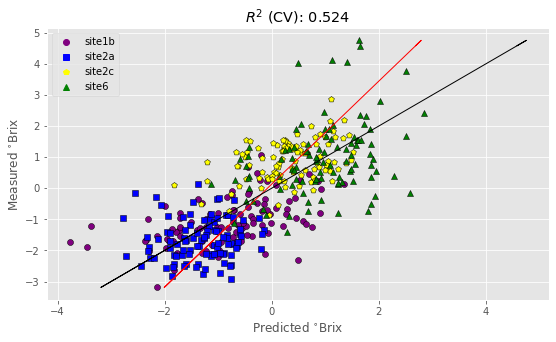

In [15]:
file_name_d15n_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d15n_max_resampled.csv'
simple_pls_cv(opt_Xc_d15n_max, y_d15n_max, ncomp_d15n_max, labels, file_name_d15n_max)

In [16]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_d15n_max, scale=True)
pls_final.fit(opt_Xc_d15n_max, y_d15n_max)




PLSRegression(n_components=15)

In [17]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list


[-3.505117753615595,
 5.681925845519702,
 31.019861310196106,
 58.444038534662,
 -28.70973945567883,
 -154.2397493209359,
 -4.0656209980838245,
 43.586689462353,
 1.0041143872783695,
 -1.5321468073863804,
 53.42346458302737,
 -9.764671757546278,
 36.028289126270735,
 -2.720216089975304,
 -181.11678891598524,
 -12.216311872548241,
 41.105443462841194,
 15.20187120068342,
 -31.007747136529584,
 11.350589277765188,
 19.979895786517538,
 -25.068020903724708,
 1.0532465986241466,
 -33.84114843209678,
 -36.621409357209785,
 -14.180998614045459,
 -40.29411093117658,
 -8.58096265163732,
 42.70252187067449,
 -22.04818150992345,
 -37.466386413645374,
 -12.068866162576331,
 -19.378001979899842,
 5.93509593505251,
 8.372312140584764,
 -29.510908496633206,
 154.0576975175785,
 -35.020295854107125,
 18.972120354973246,
 38.780720724204336,
 10.550178660836616,
 16.42753440800416,
 12.94080890776855,
 46.52643079728806,
 -0.0026227289873853713,
 -40.17285603948457,
 56.44411987883273,
 120.0754973716

In [18]:
transformed_intercept

array([6.56730887])

In [19]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-3.505117753615595,
 5.681925845519702,
 31.019861310196106,
 58.444038534662,
 -28.70973945567883,
 -154.2397493209359,
 -4.0656209980838245,
 43.586689462353,
 1.0041143872783695,
 -1.5321468073863804,
 53.42346458302737,
 -9.764671757546278,
 36.028289126270735,
 -2.720216089975304,
 -181.11678891598524,
 -12.216311872548241,
 41.105443462841194,
 15.20187120068342,
 -31.007747136529584,
 11.350589277765188,
 19.979895786517538,
 -25.068020903724708,
 1.0532465986241466,
 -33.84114843209678,
 -36.621409357209785,
 -14.180998614045459,
 -40.29411093117658,
 -8.58096265163732,
 42.70252187067449,
 -22.04818150992345,
 -37.466386413645374,
 -12.068866162576331,
 -19.378001979899842,
 5.93509593505251,
 8.372312140584764,
 -29.510908496633206,
 154.0576975175785,
 -35.020295854107125,
 18.972120354973246,
 38.780720724204336,
 10.550178660836616,
 16.42753440800416,
 12.94080890776855,
 46.52643079728806,
 -0.0026227289873853713,
 -40.17285603948457,
 56.44411987883273,
 120.0754973716

# D15N STD

In [20]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(X_d15n_std, y_d15n_std, 20)



20/20 components processed

Optimal number of components: 12
Start feature index: 340

Wavelength indices to keep: [194, 281, 246, 7, 37, 207, 211, 391, 349, 326, 259, 35, 268, 57, 353, 245, 114, 160, 14, 286, 355, 11, 394, 9, 36, 61, 190, 389, 48, 374, 10, 4, 408, 112, 308, 33, 359, 32, 217, 363, 354, 147, 405, 60, 29, 351, 2, 65, 214, 191, 410, 216, 395, 0, 417, 316, 8, 327, 204, 403, 317, 22, 59, 361, 26, 149, 283, 213, 154, 360, 31, 328, 393, 392, 303, 318, 24, 192, 412, 399, 16, 307, 23, 212]
Corresponding coefficients: [-0.09349146279109867, 0.0942534974768933, 0.09439494891320167, 0.09599445515024088, 0.09643137179486523, -0.09661763967047247, -0.09762040148645719, 0.09882342587976144, -0.10016346760326836, 0.10178335341909252, 0.10183333776535955, -0.10249514833773715, 0.10291087714200153, -0.10406147349538732, -0.10589360407002157, 0.10778973042086974, 0.10942370911449047, -0.1101365760534883, -0.11079526771839253, 0.11202867528655831, -0.11241802757839059, 0.11282049799950171

R2 calib: 0.723
R2 CV: 0.574
RMSE calib: 0.325
RMSE CV: 0.403
Intercept: 0.903203174496077, Slope: 0.660791109308281


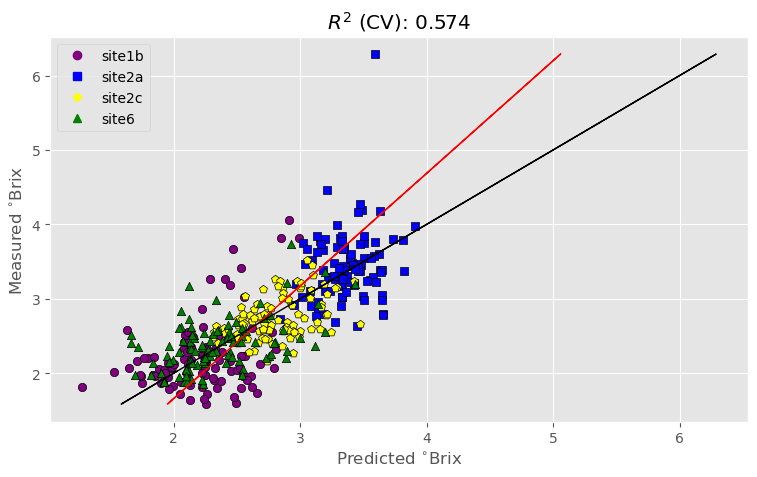

In [21]:
file_name_d15n_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\d15n_std_resampled.csv'
simple_pls_cv(opt_Xc_d15n_std, y_d15n_std, ncomp_d15n_std, labels, file_name_d15n_std)

In [22]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_d15n_std, scale=True)
pls_final.fit(opt_Xc_d15n_std, y_d15n_std)





PLSRegression(n_components=12)

In [23]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list


[-1.4145826296622392,
 3.2676912548665267,
 3.472904596996767,
 36.314396093139536,
 43.071505027368666,
 -0.44084194314131275,
 -1.5165136978685354,
 8.838467906423165,
 -9.289284247155338,
 7.639119471420874,
 4.185815149883338,
 -27.02679458504216,
 1.4885861928018156,
 -13.021900855568541,
 -7.136170197995865,
 5.350569386758247,
 10.148675514802378,
 -7.291485382708958,
 -32.701494092833585,
 -0.3048779797749763,
 -6.977433806671258,
 43.28477292995132,
 8.044265240231304,
 34.43506417396447,
 -26.651649795865623,
 -12.535412176635392,
 -3.9100202182194628,
 10.857718855937389,
 17.142577278821857,
 9.810997926218352,
 -43.26569952039788,
 -6.412242267533937,
 4.616371447457784,
 10.602841625320252,
 -0.00523357088227944,
 -15.587302602784607,
 -11.477106287452353,
 -41.084513921209066,
 -6.151668604657412,
 -10.226752293249314,
 -11.442428176332323,
 5.146702147220581,
 -15.42618387810395,
 -15.027173611521754,
 34.62197995935541,
 -10.54306975570834,
 8.05009194146288,
 17.36826

In [24]:
transformed_intercept

array([-1.44398327])

# SLA

In [11]:
sla_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\numpy\ymax_sla2.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\numpy\std_sla2.npy',  allow_pickle=True)

In [12]:
y_sla_max = np.array(sla_trait_pdf_ymax)
y_sla_std = np.array(sla_trait_pdf_std)

In [13]:
y_sla_max_df = pd.DataFrame(y_sla_max, columns=['y_value', 'filename'])
y_sla_max_df['filename'] = y_sla_max_df['filename'].str.replace('sla_', '')

y_sla_max_df['y_value'] = pd.to_numeric(y_sla_max_df['y_value'])
y_sla_max_df_array = y_sla_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_sla_max_df = pd.merge(df_spectral, y_sla_max_df, on='filename')
 # Band columns as predictors
    
X_sla_ymax = merged_y_sla_max_df.filter(regex='^band_').values 
y_sla_max = merged_y_sla_max_df[['y_value']].values  

In [14]:
y_sla_std_df = pd.DataFrame(y_sla_std, columns=['y_value', 'filename'])
y_sla_std_df['filename'] = y_sla_std_df['filename'].str.replace('sla_', '')

y_sla_std_df['y_value'] = pd.to_numeric(y_sla_std_df['y_value'])
y_sla_std_df_array = y_sla_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_sla_std_df = pd.merge(df_spectral, y_sla_std_df, on='filename')
 # Band columns as predictors
    
X_sla_std = merged_y_sla_std_df.filter(regex='^band_').values 
y_sla_std = merged_y_sla_std_df[['y_value']].values  

In [15]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(X_sla_ymax, y_sla_max, 20)

20/20 components processed

Optimal number of components: 17
Start feature index: 362

Wavelength indices to keep: [110, 24, 391, 268, 187, 220, 27, 350, 64, 403, 340, 37, 285, 210, 125, 328, 346, 383, 319, 179, 45, 5, 308, 231, 226, 185, 203, 2, 0, 41, 34, 286, 394, 30, 55, 412, 66, 230, 378, 284, 218, 389, 67, 38, 70, 71, 317, 329, 283, 52, 69, 318, 28, 314, 19, 216, 345, 68, 384, 18, 316, 219]
Corresponding coefficients: [0.1078743837221251, -0.10835900418564387, 0.10866260014600279, 0.1098127989158408, -0.11040955052431363, 0.11048750506678996, -0.11150468892910037, 0.1135312600834277, 0.11378761882534186, -0.11576052054690529, 0.11603338264716674, 0.11610798487522232, -0.11689458221238953, -0.11954378672925285, 0.11967270772535848, -0.12330830674346231, 0.12348900398949714, 0.1238894157988999, -0.12414636008683666, -0.12435566620006257, -0.1269395505432257, -0.12918723979036636, 0.12958782839577873, 0.13062620219438761, 0.13408986631962283, -0.13506560604669743, 0.1362791715836093

R2 calib: 0.767
R2 CV: 0.642
RMSE calib: 0.155
RMSE CV: 0.192
Intercept: 1.28803298953518, Slope: 0.7121087136247495


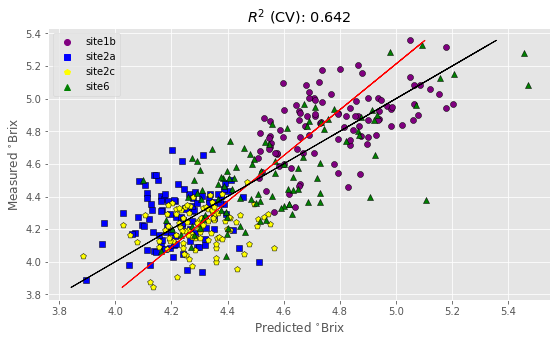

In [16]:
file_name_sla_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\sla_max_resampled.csv'
simple_pls_cv(opt_Xc_sla_max, y_sla_max,                             
                             ncomp_sla_max, labels, file_name_sla_max)

In [17]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_sla_max, scale=True)
pls_final.fit(opt_Xc_sla_max, y_sla_max)





PLSRegression(n_components=17)

In [18]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc_sla_max[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [4.57791556 4.84594327 4.93979294 5.02681835 4.97957472]
Sklearn predictions: [4.57791561 4.8459432  4.939793   5.02681836 4.97957472]
Max difference: 7.729969375702694e-08


In [19]:
transformed_intercept

array([5.42798451])

In [20]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[7.777134691690293,
 -14.191789153042151,
 4.612198506217149,
 -4.768619128300023,
 -14.303667786442654,
 6.867516540574901,
 -30.511368162353552,
 14.631144749682198,
 8.334065493831355,
 -10.380308549317084,
 2.238154198493808,
 17.893029462796036,
 -0.27212881390626537,
 -1.8487274152120294,
 11.437437776843742,
 -2.351614378402682,
 4.500373586283948,
 8.24161737715021,
 -8.401874446135801,
 -4.560025001233339,
 -12.502885033530871,
 4.028024865735388,
 0.01129773114909131,
 1.0245697196099828,
 13.788031644754541,
 -7.17273196331869,
 0.013383849389632784,
 -9.012080281317015,
 3.7146557406048237,
 21.39253434301097,
 -8.217920848160542,
 -0.9528352750192708,
 -8.588805224422268,
 38.74500135892043,
 -3.5820645703304077,
 -10.842328794983759,
 -23.23023029407275,
 21.200844675114237,
 21.22158944895242,
 5.013403031789639,
 3.2396850226314227,
 -24.584208371118816,
 -7.186007661805381,
 23.249162353649073,
 -7.7727567601399805,
 14.543210465322593,
 -5.385667122777413,
 -31.889535

In [21]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(X_sla_std, y_sla_std, 30)





30/30 components processed

Optimal number of components: 12
Start feature index: 376

Wavelength indices to keep: [410, 223, 407, 209, 9, 6, 37, 328, 114, 13, 423, 69, 190, 356, 353, 320, 259, 311, 47, 4, 387, 112, 10, 60, 401, 216, 17, 214, 30, 22, 310, 312, 2, 316, 16, 54, 70, 403, 31, 14, 217, 191, 25, 193, 18, 405, 192, 406]
Corresponding coefficients: [-0.02515784304647741, 0.025242093641305478, 0.025541880049330456, -0.02558143380129739, 0.025935706269036338, -0.026008320692731905, 0.026310439190581743, 0.02645673252234771, 0.026466205654773887, 0.026496164268452804, 0.02679238837385286, -0.027018827249204177, -0.027146102544441636, -0.027420952870040913, -0.027493829866002167, 0.027536555790537865, 0.027593477768743654, -0.027791624884704203, -0.027846352151804424, 0.027957026977931315, -0.02825856048907839, 0.029396691665301344, -0.029610606976301277, -0.02979613762723493, 0.030627615742726145, -0.031542952567477855, 0.03227652740158247, 0.033323322110618794, 0.033551538679220

R2 calib: 0.743
R2 CV: 0.651
RMSE calib: 0.061
RMSE CV: 0.071
Intercept: 0.1369395811908711, Slope: 0.6935498135645519


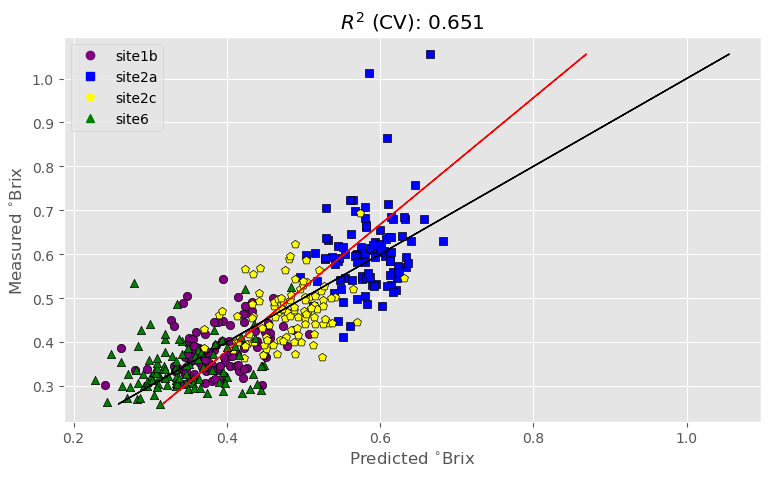

In [22]:

file_name_sla_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\sla_std_resampled.csv'
simple_pls_cv(opt_Xc_sla_std, y_sla_std, ncomp_sla_std, labels, file_name_sla_std)

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=12, scale=True)
pls_final.fit(opt_Xc_sla_std, y_sla_std)





PLSRegression(n_components=12)

In [24]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef

# 3. Prediction function (no data scaling needed)
def predict_with_transformed_coef(X_new):
    """Predict directly on raw/unscaled X_new"""
    return X_new @ transformed_coef + transformed_intercept

# 4. Verify against sklearn's predict()
X_test = opt_Xc_sla_std[:5]
manual_pred = predict_with_transformed_coef(X_test).flatten()
sklearn_pred = pls_final.predict(X_test).flatten()

print("Manual predictions:", manual_pred)
print("Sklearn predictions:", sklearn_pred)
print("Max difference:", np.max(np.abs(manual_pred - sklearn_pred)))

# This will pass (identical predictions)
assert np.allclose(manual_pred, sklearn_pred, atol=1e-8)

Manual predictions: [0.37432632 0.38560691 0.32782813 0.33857223 0.40975842]
Sklearn predictions: [0.37432631 0.38560691 0.32782814 0.33857224 0.40975842]
Max difference: 1.175794811514308e-08


In [25]:
coef_list = transformed_coef.flatten().tolist()
coef_list

[-1.285150138055155,
 3.1289374148502547,
 0.7789274398627287,
 -0.20963424298865269,
 3.5140065746133917,
 -2.888603640971448,
 12.088858416690368,
 4.15146887655899,
 2.624463273847193,
 9.82526286012735,
 0.319284109898329,
 -1.9418801101063021,
 -0.4589854116973823,
 -3.5113665772014944,
 -4.0001470445939145,
 5.789009195681659,
 2.8498505942511185,
 -0.009646783489506804,
 1.217628136577171,
 0.7506430345715364,
 -2.335780048239033,
 2.9364586755742343,
 -9.265548125414977,
 -2.8051738173624794,
 1.7948765823503412,
 -1.1744785661482757,
 7.101601891437319,
 0.18956198386942458,
 11.040006905205086,
 1.2486714109904897,
 0.017192175190083165,
 -0.3663021251077153,
 1.6160984948769475,
 -1.8171424692620444,
 13.228496544938634,
 -3.394295034211285,
 -3.613711027764374,
 2.27626873120888,
 -17.660638883996207,
 -5.46894324159093,
 -1.9184632745945074,
 -1.2073180658258198,
 -10.707237983937352,
 0.20227474121989425,
 2.886810840832154,
 -2.7213771320070417,
 -2.745475209748695,
 -2.

In [26]:
transformed_intercept

array([0.00245135])

# LDMC

In [8]:
ldmc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\std_ldmc.npy',  allow_pickle=True)

In [9]:
ldmc_trait_pdf_ymax.shape

(400, 2)

In [10]:

y_ldmc_max = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std = np.array(ldmc_trait_pdf_std)

In [11]:
y_ldmc_max_df = pd.DataFrame(ldmc_trait_pdf_ymax, columns=['y_value', 'filename'])
y_ldmc_max_df['filename'] = y_ldmc_max_df['filename'].str.replace('ldmc_', '')

y_ldmc_max_df['y_value'] = pd.to_numeric(y_ldmc_max_df['y_value'])
y_ldmc_max_df_array = y_ldmc_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_ldmc_max_df = pd.merge(df_spectral, y_ldmc_max_df, on='filename')
 # Band columns as predictors
    
X_ldmc_ymax = merged_y_ldmc_max_df.filter(regex='^band_').values 
y_ldmc_max = merged_y_ldmc_max_df[['y_value']].values  

In [12]:
y_ldmc_std_df = pd.DataFrame(ldmc_trait_pdf_std, columns=['y_value', 'filename'])
y_ldmc_std_df['filename'] = y_ldmc_std_df['filename'].str.replace('ldmc_', '')

y_ldmc_std_df['y_value'] = pd.to_numeric(y_ldmc_std_df['y_value'])
y_ldmc_std_df_array = y_ldmc_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_ldmc_std_df = pd.merge(df_spectral, y_ldmc_std_df, on='filename')
 # Band columns as predictors
    
X_ldmc_std = merged_y_ldmc_std_df.filter(regex='^band_').values 
y_ldmc_std = merged_y_ldmc_std_df[['y_value']].values  

In [13]:
X_ldmc_std.shape

(335, 424)

In [14]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(X_ldmc_ymax, y_ldmc_max, 30)


30/30 components processed

Optimal number of components: 12
Start feature index: 357

Wavelength indices to keep: [205, 151, 39, 264, 66, 378, 211, 345, 349, 377, 407, 284, 382, 255, 346, 26, 282, 355, 31, 287, 347, 396, 302, 33, 212, 221, 350, 308, 28, 412, 69, 17, 400, 326, 29, 398, 384, 36, 67, 329, 217, 219, 20, 209, 403, 41, 42, 316, 312, 6, 218, 314, 409, 5, 215, 401, 328, 15, 68, 24, 23, 16, 192, 18, 216, 213, 2]
Corresponding coefficients: [0.09330318253801279, 0.09388538459444098, 0.09393080783514608, 0.09434662931672715, 0.09514535226856986, -0.09570265327679725, -0.09669612511515838, -0.09878284537329483, -0.0995901152565648, -0.10228836798322549, 0.1028957848463258, -0.10567341206514307, -0.10631702918427222, 0.10762146265214526, -0.10893254225989225, -0.10899484679403236, -0.10914580047921987, -0.10947312619543227, -0.1099907731709071, 0.11120205675082599, -0.11481951688564539, 0.11564726177876997, -0.11856805206243846, -0.11982710007962923, -0.12031172452754714, -0.12097

R2 calib: 0.837
R2 CV: 0.741
RMSE calib: 0.220
RMSE CV: 0.278
Intercept: -0.09127373658755374, Slope: 0.79683017984277


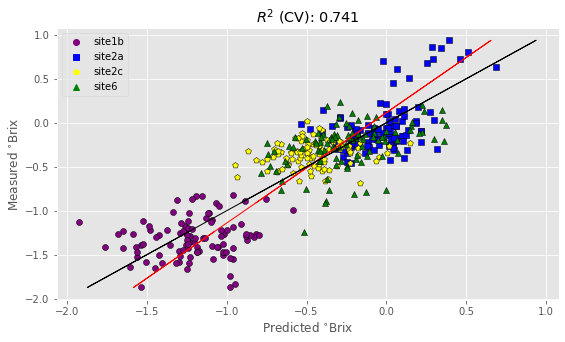

In [15]:
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\ldmc_max_resampled.csv'
simple_pls_cv(opt_Xc_ldmc_max,y_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [16]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_ldmc_max, scale=True)
pls_final.fit(opt_Xc_ldmc_max,y_ldmc_max)





PLSRegression(n_components=12)

In [17]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[0.04200271084391284,
 5.618223250089885,
 10.562230230567952,
 13.200033878805757,
 12.906509378046817,
 -9.994916353771119,
 -0.9561088156960088,
 -11.420901272980652,
 -14.71383398643438,
 -13.52271215235331,
 6.5710521243048605,
 -1.7722527563870858,
 -15.652174968784264,
 11.855145692284133,
 -13.167559163644942,
 -56.54674692729315,
 3.2521938703267983,
 -14.583350401030025,
 -28.79134798723457,
 0.3142314821808362,
 -4.816864200503955,
 11.30047218056712,
 -0.005198979018932897,
 -11.017444548519846,
 -1.4568521433886759,
 -0.4566535418490603,
 -16.49653087644365,
 -0.009887966182591948,
 -45.5725088190208,
 8.454403422375226,
 -9.063087695943956,
 17.21959260886056,
 12.617751182349277,
 3.8796817843579396,
 41.26118270735533,
 10.328388698799863,
 17.666574130079972,
 -32.34828166498139,
 10.371328600903057,
 8.573231241409704,
 -1.8333194046361982,
 -2.2182402113922186,
 37.8346466405154,
 0.9087238314020448,
 7.10138425051404,
 -22.806964183842933,
 -40.559979423427016,
 4.8

In [18]:
transformed_intercept

array([-3.70404155])

# ldmc std

In [14]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(X_ldmc_std, y_ldmc_std, 30)



30/30 components processed

Optimal number of components: 17
Start feature index: 391

Wavelength indices to keep: [346, 47, 4, 211, 343, 152, 389, 410, 283, 234, 390, 387, 217, 191, 391, 394, 31, 65, 40, 51, 397, 34, 16, 240, 393, 19, 396, 401, 282, 216, 284, 399, 192]
Corresponding coefficients: [-0.06780667189035389, -0.06780715964039725, -0.06790356150488358, 0.06811143586626218, -0.06984670760145542, 0.07050694293057327, -0.07315644472173809, -0.0741139844483393, 0.07487715624715688, 0.07522052457356118, 0.07757429112992273, -0.07806962973107186, -0.07814469909618904, -0.0812288307838824, 0.08182776560226987, 0.08399041892483543, -0.08527176411435305, 0.08681857301203143, 0.09121252850123256, 0.09227339348564119, -0.09260286150331197, -0.0946683142787608, 0.09510181874771159, 0.09701994607043309, 0.09916310588482295, 0.09993796401784304, -0.10232131856372495, 0.12449366187393167, -0.12636587530015472, -0.1298145653906077, -0.14685865779962978, 0.199043296781629, -0.210751067389946

R2 calib: 0.801
R2 CV: 0.715
RMSE calib: 0.079
RMSE CV: 0.095
Intercept: 0.14329916917443097, Slope: 0.759219009144772


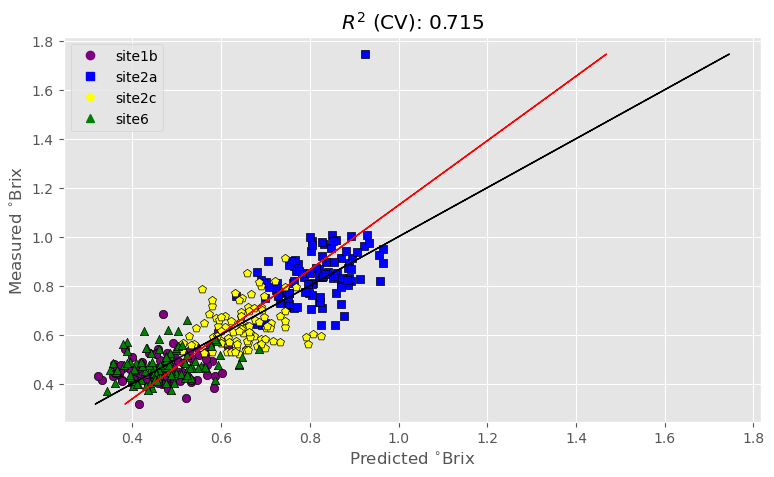

In [20]:
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\ldmc_std_resampled.csv'
simple_pls_cv(opt_Xc_ldmc_std,y_ldmc_std, ncomp_ldmc_std, labels, file_name_ldmc_max)



In [21]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=14, scale=True)
pls_final.fit(opt_Xc_ldmc_std,y_ldmc_std)




PLSRegression(n_components=15)

In [22]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[5.588657905489148,
 -20.23229075136952,
 -0.0022956775978495397,
 7.155062602972901,
 0.22503886432554843,
 -8.756920575283344,
 -9.834714198990444,
 2.481810211876047,
 5.485583960473251,
 -5.622568947378136,
 -7.930279505137658,
 3.607199340184488,
 2.769629781197963,
 16.823625336918226,
 -4.729820343946286,
 1.2367454454207252,
 -1.9821787313033015,
 9.40280910590443,
 5.0748977757029845,
 0.629413439134824,
 -11.385764225406774,
 -0.4393832888003257,
 11.339393177350205,
 0.3648255761227006,
 8.656226692486415,
 4.923740797398418,
 1.1251182175453256,
 9.35767068501711,
 -0.06590166627631118,
 8.557364884516332,
 -2.5184359164255503,
 0.4334712092557412,
 3.846329995225458,
 -0.15079577579347742,
 5.7398217912124,
 -12.676134233646216,
 -6.885771304872194,
 10.434477122620144,
 13.265375305724904,
 -17.634964995416798,
 -2.719683111111201,
 3.178170489900826,
 -4.940132878300436,
 -0.45386213328733477,
 9.150026481030205,
 -9.092884322050448]

In [23]:
transformed_intercept

array([-0.38699596])

# PN

In [8]:
pn_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\ymax_pn.npy',  allow_pickle=True)
pn_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\std_pn.npy',  allow_pickle=True)

In [9]:
y_pn_max = np.array(pn_trait_pdf_ymax)

y_pn_std = np.array(pn_trait_pdf_std)

In [10]:
y_pn_max.shape

(400, 2)

In [11]:
y_pn_max_df = pd.DataFrame(y_pn_max, columns=['y_value', 'filename'])
y_pn_max_df['filename'] = y_pn_max_df['filename'].str.replace('pn_', '')

y_pn_max_df['y_value'] = pd.to_numeric(y_pn_max_df['y_value'])
y_pn_max_df_array = y_pn_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pn_max_df = pd.merge(df_spectral, y_pn_max_df, on='filename')
 # Band columns as predictors
    
X_pn_ymax = merged_y_pn_max_df.filter(regex='^band_').values 
y_pn_max = merged_y_pn_max_df[['y_value']].values  

In [12]:
y_pn_std_df = pd.DataFrame(y_pn_std, columns=['y_value', 'filename'])
y_pn_std_df['filename'] = y_pn_std_df['filename'].str.replace('pn_', '')

y_pn_std_df['y_value'] = pd.to_numeric(y_pn_std_df['y_value'])
y_pn_std_df_array = y_pn_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pn_std_df = pd.merge(df_spectral, y_pn_std_df, on='filename')
 # Band columns as predictors
    
X_pn_std = merged_y_pn_std_df.filter(regex='^band_').values 
y_pn_std = merged_y_pn_std_df[['y_value']].values  

In [13]:
opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(X_pn_ymax, y_pn_max, 30)

30/30 components processed

Optimal number of components: 14
Start feature index: 323

Wavelength indices to keep: [252, 12, 286, 312, 204, 125, 51, 414, 90, 126, 348, 278, 363, 43, 32, 160, 311, 277, 364, 310, 111, 36, 224, 302, 20, 274, 64, 35, 351, 61, 395, 147, 229, 28, 353, 406, 215, 165, 190, 368, 38, 73, 63, 400, 251, 391, 24, 378, 360, 401, 358, 33, 408, 117, 29, 366, 396, 399, 113, 242, 18, 352, 202, 205, 114, 211, 5, 403, 407, 112, 404, 110, 345, 214, 0, 66, 369, 216, 210, 52, 300, 316, 42, 115, 1, 155, 393, 152, 23, 309, 2, 22, 19, 290, 398, 303, 206, 284, 193, 14, 15]
Corresponding coefficients: [-0.6211244339149228, -0.6253234531730019, 0.6315401605107961, -0.6370102843513595, -0.638570766819257, 0.6391657118984155, 0.6415386046131772, -0.6426515627137517, -0.6440059413036868, 0.650960011890166, 0.6526051111068522, -0.6537067405939603, 0.6595950186515042, 0.6691382650340557, 0.6750738630664376, 0.6762586310501464, -0.6776307690812959, 0.6786177232010359, 0.6818374310140953

R2 calib: 0.804
R2 CV: 0.669
RMSE calib: 1.702
RMSE CV: 2.210
Intercept: -3.03126685757086, Slope: 0.7148531692011437


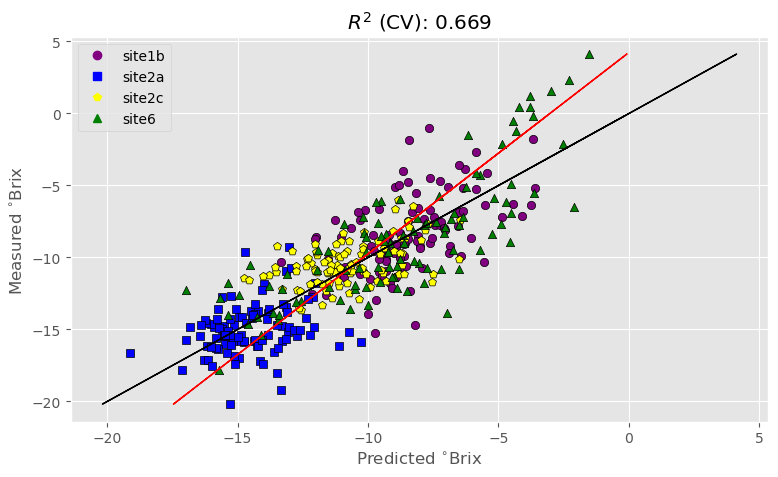

In [22]:


file_name_pn_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pn_max_resampled.csv'
simple_pls_cv(opt_Xc_pn_max, y_pn_max, ncomp_pn_max, labels, file_name_pn_max)

In [23]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pn_max, scale=True)
pls_final.fit(opt_Xc_pn_max, y_pn_max)




PLSRegression(n_components=14)

In [24]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[-46.91107663993542,
 -391.7788393403478,
 10.749627469487729,
 4.661455853394621,
 -0.08840956128644156,
 66.40312857719786,
 20.63275530819646,
 -22.93636840177693,
 -50.16957145677993,
 64.23204015331503,
 13.906204473165698,
 -2.7379481595921358,
 36.25006492226819,
 191.41104993185147,
 -12.824958953330947,
 66.76463706702324,
 -1.0609474199188997,
 72.33671454802271,
 7.786210616973104,
 0.24235367788933754,
 -6.6888111293971555,
 250.5472667954302,
 -51.957429642202854,
 0.04466250555363304,
 -173.0658595365446,
 54.700090393259856,
 -138.59764873894034,
 -396.86164822914407,
 26.74161943413865,
 131.8410541507275,
 -38.38794683010119,
 59.132710288655026,
 -108.68466932629651,
 251.96453897051924,
 63.14517215888573,
 30.565788053594282,
 40.877797294081475,
 78.13314823691728,
 48.132274508922784,
 43.005986117110965,
 240.26096247660934,
 -6.465110658798215,
 -79.95595905679298,
 -77.63133373406916,
 -64.09087548947454,
 79.5148467118327,
 -174.98073844724243,
 49.36041569009

In [25]:
transformed_intercept

array([23.18257571])

30/30 components processed

Optimal number of components: 15
Start feature index: 373

Wavelength indices to keep: [148, 397, 154, 193, 226, 234, 219, 343, 227, 147, 2, 365, 165, 255, 34, 26, 30, 322, 33, 237, 240, 316, 312, 23, 315, 281, 19, 210, 70, 110, 203, 403, 190, 62, 313, 385, 14, 54, 50, 45, 4, 231, 37, 410, 303, 155, 214, 388, 35, 69, 36]
Corresponding coefficients: [0.346754078212235, 0.35030306046051385, -0.3517598759495705, -0.3583752704024197, 0.3589783451921832, 0.36452333691931266, 0.37120541418691827, -0.3723623914275649, 0.37443405210091724, 0.37654829210970775, 0.3780812312136586, -0.39283670050700736, 0.39342681675283886, -0.3945607983846866, -0.39616299274638545, -0.39663960418430333, 0.39786486101228064, 0.3987636242070686, 0.40149597368114043, 0.41615695950060144, 0.42294845098766015, -0.42804509290612747, -0.43282136712915176, -0.44793044171233887, -0.454917068312781, -0.46071539800667755, -0.4658095799149638, -0.4665876886403025, -0.4685357806568526, 0.46952653

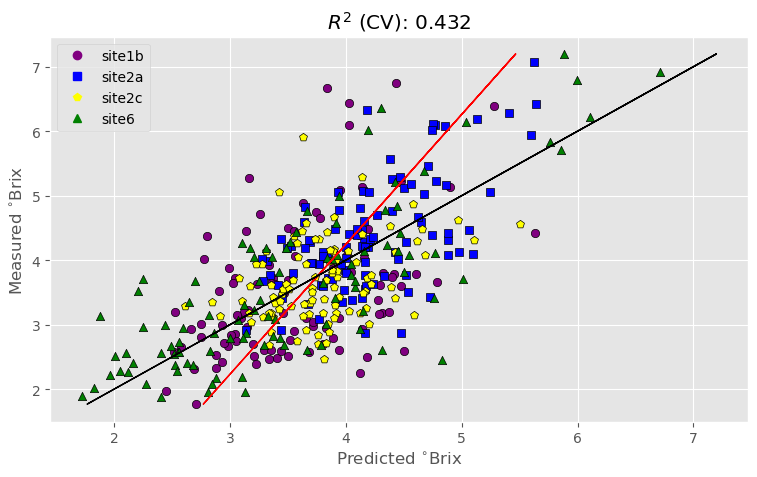

In [21]:
opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(X_pn_std, y_pn_std, 30)


file_name_pn_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pn_std_resampled.csv'
simple_pls_cv(opt_Xc_pn_std,y_pn_std,
                             ncomp_pn_std, labels, file_name_pn_std)

In [26]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pn_std, scale=True)
pls_final.fit(opt_Xc_pn_std,y_pn_std)





PLSRegression(n_components=15)

In [27]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[-12.17551421004814,
 30.27539096910666,
 0.6257692081791042,
 -10.522451257116865,
 -7.594401117442551,
 41.73761629751003,
 -3.935235885359531,
 -54.69067634850942,
 49.496877749651794,
 12.980272634581837,
 28.31402700768193,
 -84.23384116868579,
 36.45368764613813,
 -70.83258351264212,
 -44.9417719079776,
 -16.300215028086086,
 -5.502112885623557,
 41.338688799438465,
 -21.95547304486162,
 -10.446162561500735,
 17.1831738258995,
 -1.459649456771943,
 -1.4868432115485972,
 -51.186058938927914,
 -3.883214617315702,
 -67.81271724902754,
 -58.08415718342938,
 -1.6894270664521631,
 -0.1322046878747621,
 48.4625930471748,
 0.12664610056989078,
 19.075100498570464,
 7.439164041481227,
 123.75021338545207,
 -3.4193189670971074,
 84.96283818841275,
 173.15439742427483,
 -132.81080077257377,
 -96.4535261348063,
 -71.82422358110593,
 -14.327694713578026,
 51.08924219797818,
 42.26793411689746,
 57.22887767985399,
 0.07785491812121124,
 -52.95967466077904,
 12.350542993118768,
 -40.39289897308

In [28]:
transformed_intercept

array([3.81726554])

# PC

In [8]:
pc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_uas_modeling\plsr_training\version4\numpy\std_pc.npy',  allow_pickle=True)

In [9]:
y_pc_max = np.array(pc_trait_pdf_ymax)

y_pc_std = np.array(pc_trait_pdf_std)

In [10]:
y_pc_max_df = pd.DataFrame(y_pc_max, columns=['y_value', 'filename'])
y_pc_max_df['filename'] = y_pc_max_df['filename'].str.replace('pc_', '')

y_pc_max_df['y_value'] = pd.to_numeric(y_pc_max_df['y_value'])
y_pc_max_df_array = y_pc_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pc_max_df = pd.merge(df_spectral, y_pc_max_df, on='filename')
 # Band columns as predictors
    
X_pc_ymax = merged_y_pc_max_df.filter(regex='^band_').values 
y_pc_max = merged_y_pc_max_df[['y_value']].values  

In [11]:
y_pc_std_df = pd.DataFrame(y_pc_std, columns=['y_value', 'filename'])
y_pc_std_df['filename'] = y_pc_std_df['filename'].str.replace('pc_', '')

y_pc_std_df['y_value'] = pd.to_numeric(y_pc_std_df['y_value'])
y_pc_std_df_array = y_pc_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_pc_std_df = pd.merge(df_spectral, y_pc_std_df, on='filename')
 # Band columns as predictors
    
X_pc_std = merged_y_pc_std_df.filter(regex='^band_').values 
y_pc_std = merged_y_pc_std_df[['y_value']].values  

20/20 components processed

Optimal number of components: 16
Start feature index: 335

Wavelength indices to keep: [236, 279, 231, 409, 204, 188, 193, 114, 385, 384, 142, 112, 124, 16, 137, 200, 312, 206, 366, 270, 286, 208, 143, 17, 277, 230, 185, 318, 55, 397, 115, 217, 48, 152, 326, 58, 37, 345, 389, 51, 186, 300, 313, 69, 252, 321, 264, 235, 110, 410, 322, 30, 412, 402, 187, 238, 395, 373, 153, 393, 27, 246, 214, 406, 244, 147, 15, 191, 22, 38, 40, 379, 70, 388, 316, 317, 42, 368, 353, 320, 0, 24, 190, 394, 2, 155, 319, 203, 21]
Corresponding coefficients: [-0.010832926192209215, 0.010935820512311912, -0.011018938134671703, 0.011122874882498466, -0.011335982825350874, 0.01134189279103665, 0.01144969475740479, 0.011484316876607052, 0.011602119624813995, 0.011627201609335442, -0.011788384972282665, 0.01181669998813072, -0.011989320950558565, 0.01202911074541026, -0.012102997550556016, -0.012113095043846368, 0.012160710888942914, 0.01227375381446434, 0.012327708411258914, 0.0123365553

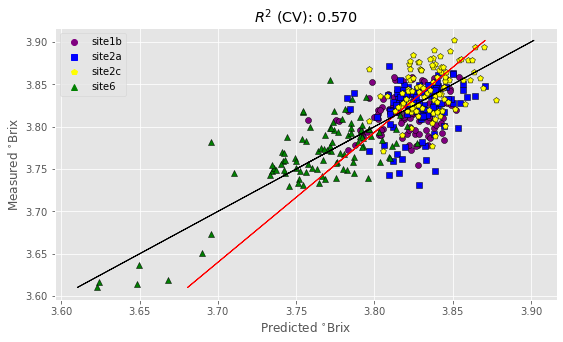

In [12]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(X_pc_ymax, y_pc_max, 20)

file_name_pc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pc_max_resampled.csv'
simple_pls_cv(opt_Xc_pc_max, y_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

In [13]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pc_max, scale=True)
pls_final.fit(opt_Xc_pc_max, y_pc_max)




PLSRegression(n_components=16)

In [14]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[1.0244540452502373,
 1.3118764822803426,
 -0.9172357825605675,
 0.7174096559088557,
 -0.0038772391318726324,
 0.7442367039684317,
 0.2672579514109481,
 0.3141157747585353,
 1.20824178289642,
 -0.6090010269630901,
 -0.3576056327678176,
 1.1093111704062686,
 -0.9532081022051898,
 1.1941418081469715,
 -0.025075128998437512,
 0.00047772522687186946,
 -0.059369521517346355,
 0.01292126606545983,
 1.7789703907402792,
 1.2366177566397136,
 0.23124010358180686,
 0.03129444667278653,
 -1.0744864370351686,
 1.1036351106771267,
 0.06701837555930283,
 -1.638911304769968,
 0.8808391641344155,
 -0.2656013294961156,
 -0.9110804085906754,
 -0.6922987172968886,
 0.380079474143991,
 -1.0126041900038076,
 4.6263045441550865,
 -0.1354140470190222,
 -1.0828323796954011,
 -1.1775044472229046,
 1.103228986009027,
 -1.6051951973968308,
 2.120137886893235,
 -2.422492007053972,
 0.2272916154369726,
 -0.0015544613707720925,
 0.18620218480288978,
 1.2240799883662539,
 -0.9757409407318292,
 1.035775546758967,
 -1

In [15]:
transformed_intercept

array([3.75237376])

30/30 components processed

Optimal number of components: 12
Start feature index: 391

Wavelength indices to keep: [317, 350, 283, 190, 161, 423, 286, 318, 54, 213, 289, 35, 28, 328, 315, 398, 404, 5, 399, 216, 284, 316, 20, 15, 412, 401, 10, 31, 217, 16, 191, 405, 192]
Corresponding coefficients: [-0.0036065142787739877, -0.003667426893718479, 0.0037134374742273076, -0.00379052654771084, -0.003894634452145651, 0.0039473788778361775, 0.004080061439361422, -0.004111949452862844, -0.004160450513605083, -0.004165692979058433, 0.004179782351703965, -0.004260815822930377, 0.004269843583480195, 0.00428437081665478, -0.004323020254763051, 0.004395127920286982, -0.004420306915142608, 0.004443576374584649, 0.0044711914803569905, -0.004783937779384233, -0.005002396475761378, -0.005039289087241896, 0.005117904560696462, 0.005363192375001098, 0.005612035089886916, 0.0063727538535050384, -0.006594706123064737, -0.006595885614333982, -0.006919187737178107, 0.006994512122397651, -0.008330808937535272

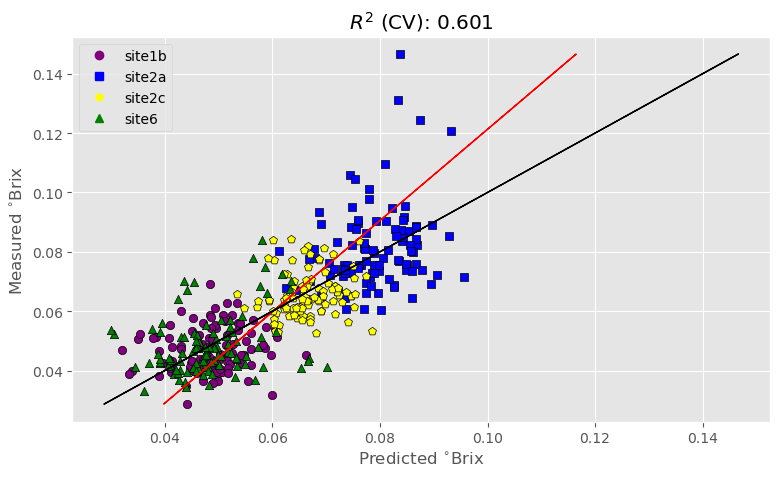

In [16]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(X_pc_std, y_pc_std, 30)


file_name_pc_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples4\csv\pc_std_resampled.csv'
simple_pls_cv(opt_Xc_pc_std, y_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

In [17]:
from sklearn.cross_decomposition import PLSRegression

pls_final = PLSRegression(n_components=ncomp_pc_std, scale=True)
pls_final.fit(opt_Xc_pc_std, y_pc_std)





PLSRegression(n_components=12)

In [19]:
# 1. Get model parameters
coef = pls_final.coef_.T  # Shape (n_features, 1)
x_mean = pls_final._x_mean  # (n_features,)
x_std = pls_final._x_std    # (n_features,)
y_mean = pls_final._y_mean  # (1,)

# 2. Calculate transformed coefficients (for direct use on raw X)
# These coefficients absorb all scaling factors
transformed_coef = coef / x_std.reshape(-1, 1)
transformed_intercept = y_mean - (x_mean / x_std) @ coef
coef_list = transformed_coef.flatten().tolist()
coef_list

[-0.1278987932812475,
 -0.8011049196469496,
 0.2607498347334495,
 0.1197402559108742,
 0.6183099359202497,
 0.05148140432918772,
 0.046194872429592145,
 -0.09217548746627209,
 -0.5771530737381725,
 -0.07637532592088675,
 0.002001165161652733,
 -0.09023976288639698,
 2.335566238536591,
 1.0581767256316987,
 -0.028979018359146656,
 0.1619398155442355,
 -0.2593076863970101,
 0.6100670797503076,
 0.24959287782509437,
 -0.22404223338164284,
 -0.07692979632424377,
 -0.1356747390025796,
 1.2456940375157253,
 1.3655136558673393,
 0.49791279962291574,
 0.22711088488642278,
 -1.5253492417646424,
 -2.436428857681638,
 -0.36004465028399907,
 1.0841716919107067,
 -0.3164843167190954,
 -0.3401489620300656,
 -0.3661988256699709]

In [20]:
transformed_intercept

array([-0.00278441])